In [278]:
import xml.etree.ElementTree as ET
import pandas as pd
import seaborn as sn
import matplotlib as mpl

In [246]:
tree = ET.parse("benchmark.xml")

In [247]:
root = tree.getroot()
case = root.find("./Group/*[@name='benchmark parsers']")

value_means = []
value_stddev = []
view_means = []
view_stddev = []
index = []

for child in case.findall("Section"):
    section_name = child.get("name")
    decode_value = child.find(".//BenchmarkResults[@name='decode_value']")
    decode_view  = child.find(".//BenchmarkResults[@name='decode_view']")

    index.append(section_name)
    value_means.append(float(decode_value.find("./mean").get("value")))
    value_stddev.append(float(decode_value.find("./standardDeviation").get("value")))
    view_means.append(float(decode_view.find("./mean").get("value")))
    view_stddev.append(float(decode_view.find("./standardDeviation").get("value")))
    

In [268]:
data = pd.DataFrame({
    "decode_value": value_means,
    "decode_view" : view_means,
    "file": index,
    }
)

In [249]:

plotdata = pd.melt(data, id_vars=["file"])
plotdata

,file,variable,value
0,fedora workstation,parse_value,9788.0
1,NASA mdim_color,parse_value,10021.0
2,COVID-19 image dataset,parse_value,9981.0
3,fedora workstation,parse_view,550.0
4,NASA mdim_color,parse_view,2652.0
5,COVID-19 image dataset,parse_view,2410.0


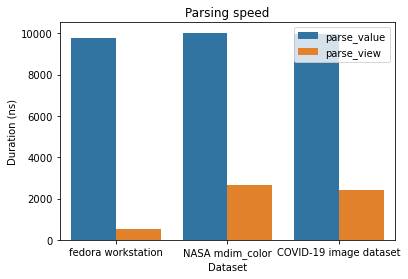

In [284]:
ax = sn.barplot(x="file", y="value", hue="variable", 
                     data=plotdata)
ax.set_xlabel("Dataset")
ax.set_ylabel("Duration (ns)")
ax.legend(title=None)
ax.set_title("Parsing speed")

fig = ax.get_figure()
fig.savefig("parsing_speed.svg") 